In [1]:
import pandas as pd

publi = pd.read_csv('Advertising.csv', index_col=0)
publi.head()


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
print(type(publi))

<class 'pandas.core.frame.DataFrame'>


In [3]:
print(publi.shape)

(200, 4)


In [4]:
x = publi[['TV', 'Radio', 'Newspaper']]
y = publi['Sales']

In [5]:
x.shape

(200, 3)

In [6]:
y.shape

(200,)

## Modelo de Regressão Linear

#### É usado em machine learning para fazer previsões quantitativas
#### O método usado é colocar em um gráfico uma variável X independendete e uma Y dependente, e tentar visualizar um padrão em entender a relação que Y tem de X. O que esse modelo faz é construir uma linha, que é chamada de liha de regessão entre as duas variáveis. O método mais usado para chegar nessa linha é o mais usado Least Squares Method. 
#### Essa linha, não é perfeita, ela pode passar em cima de alguns pontos, e ficar longe de outros. Ela pega a distância desses pontos ate a linha, vamos chamar de e. Então ele calcula o ero total com Erro = (e1)² + (e2)² ... até produzir o menor erro possível.

C:\Users\Notebook\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


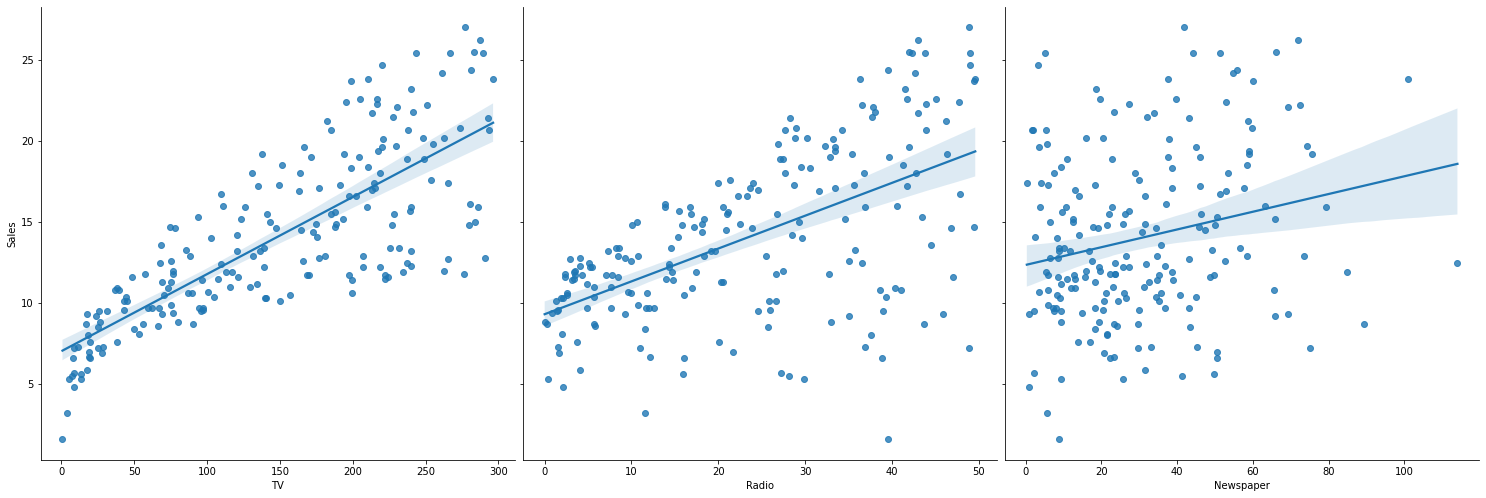

In [9]:
import seaborn as sns  
sns.pairplot(publi, x_vars=['TV', 'Radio', 'Newspaper'], y_vars = ['Sales'], size=7, kind='reg')

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) #test_size faz a divisão dos valores que temos em x para teste e treino
                                     #separamos 30% de X para test e o restante 70% para treino

In [20]:
from sklearn.linear_model import LinearRegression
reglin = LinearRegression()
reglin.fit(x_train, y_train)


LinearRegression()

## Coeficientes: Aumento das vendas para cada 1un investida em publicidade

In [19]:
list(zip(['TV', 'Radio', 'Newspaper'],reglin.coef_))  # INTERPRETANDO O RESULTADO ABAIXO 
#A cada um dolar gasto em publicidade temos o retorno de 0.04 vendas de unidade

[('TV', 0.04393005489185848),
 ('Radio', 0.18761027398416041),
 ('Newspaper', -0.001187755938556266)]

### Previsões 

In [21]:
print(reglin.predict([[230.1, 37.8, 69.2]]))

[20.17321971]


C:\Users\Notebook\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [24]:
y_prev = reglin.predict(x_test)
print(y_prev)

[21.35811149 11.88312894 19.9483148  16.81006221 18.92566068 20.98980853
 11.99921443  5.75549894 16.22416439 17.98400631  4.53910483 10.60782124
 10.01193806 15.40619517 16.30356687  8.59880344  9.83498918 15.28153583
 20.52554894  9.77218934  9.54606836 17.74843211 18.11629941  9.56459485
 15.61423843 11.89023995 16.09745057 16.87715998 21.14796918  7.5712225
 15.0917907  16.81326963  5.41133351 20.77496717 11.54758006 11.70712131
 13.99265475 20.7832584   3.82603072 19.67493984 23.65707682  7.89260351
 23.31500406 19.6093829  23.67168312 18.13930388 20.43012234  8.81090318
  7.05544254 12.52269061  8.14568989 22.87951362 14.91671851 17.83495795
  8.52495606 21.57658519  7.87380071 22.76671507 12.49456888 12.38564548]


In [25]:
print(y_test)

48     23.2
68     13.4
105    20.7
65     18.0
143    20.1
56     23.7
8      13.2
61      8.1
24     15.5
154    19.0
77      6.9
13      9.2
145    11.4
119    15.9
195    17.3
57      5.5
150    10.1
157    15.3
16     22.4
74     11.0
187    10.3
106    19.2
142    19.2
146    10.3
179    11.8
76      8.7
41     16.6
169    17.1
43     20.7
33      9.6
98     15.5
188    17.3
196     7.6
112    21.8
87     12.0
7      11.8
161    14.4
70     22.3
9       4.8
54     21.2
99     25.4
122     7.0
199    25.5
177    20.2
184    26.2
15     19.0
138    20.8
47     10.6
108     8.7
6       7.2
50      9.7
148    25.4
86     15.2
60     18.4
133     5.7
59     23.8
130     9.7
102    23.8
191    10.8
97     11.7
Name: Sales, dtype: float64


## Avaliação da performance

### MAE (Mean Absolut Error)

In [26]:
from sklearn import metrics     #Ele pega o valor real - valor do computador = erro, então ele faz uma média desses erros
print(metrics.mean_absolute_error(y_test, y_prev))

1.4007958827107194


### MSE (Mean Squared Error)

In [27]:
#Mesma coisa do de cima, só que quando ele acha o erro ele vai elevar ao quadrado, fazer uma média ponderada, pois cada erro vai ter um peso
print(metrics.mean_squared_error(y_test, y_prev))

2.9423691254778666


### RMSE (Root Mean Squared Error)

In [29]:
import numpy as np
#É O método de cima, porem como o MSE não tem uma resposta em unidade, o RMSE vai aplicar uma raiz quadrada no resultado, resultando em um resultado em unidades
print(np.sqrt(metrics.mean_squared_error(y_test, y_prev)))

1.7153335318467562
